Exploring Hacker News Posts

In [3]:
import csv

# Open the file and read it into a list of lists
with open('hacker_news.csv', encoding='utf8') as file:
    reader = csv.reader(file)
    hn = list(reader)

# Display the first 5 rows
for row in hn[:5]:
    print(row)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']
['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']
['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']


In [4]:
# Extract the first row (header) and assign to headers
headers = hn[0]

# Remove the header row from hn
hn = hn[1:]

# Display the headers
print(headers)

# Display the first 5 rows to verify
for row in hn[:5]:
    print(row)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']
['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']
['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']
['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']
['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']


In [5]:
# Create empty lists
ask_posts = []
show_posts = []
other_posts = []

# Loop through each row in hn
for row in hn:
    title = row[1].lower()  # Convert the title to lowercase for case-insensitive comparison
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

# Check number of posts in each list
print("Number of Ask HN posts:", len(ask_posts))
print("Number of Show HN posts:", len(show_posts))
print("Number of Other posts:", len(other_posts))

Number of Ask HN posts: 1744
Number of Show HN posts: 1162
Number of Other posts: 17194


In [5]:
# Total number of comments in ask posts
total_ask_comments = 0
for post in ask_posts:
    total_ask_comments += int(post[4])
    
# Average ask comments
avg_ask_comments = total_ask_comments / len(ask_posts)
print("Average number of comments on ask posts:", avg_ask_comments)

# Total number of comments in show posts
total_show_comments = 0
for post in show_posts:
    total_show_comments += int(post[4])
    
# Average ask comments
avg_show_comments = total_show_comments / len(show_posts)
print("Average number of comments on show posts:", avg_show_comments)

Average number of comments on ask posts: 14.038417431192661
Average number of comments on show posts: 10.31669535283993


Do Ask HN or Show HN Posts Receive More Comments?

After calculating the average number of comments:
Ask HN posts receive approximately 14.04 comments on average
Show HN posts receive approximately 10.32 comments on average

This shows that Ask HN posts tend to receive more comments than Show HN posts. This makes sense because Ask HN posts are designed to solicit responses from the community, while Show HN posts are more informational or promotional.

In [6]:
import datetime as dt

# Step 1: Create result_list with [created_at, num_comments]
result_list = []
for post in ask_posts:
    created_at = post[6]
    num_comments = int(post[4])
    result_list.append([created_at, num_comments])

# Step 2: Initialize dictionaries
counts_by_hour = {}
comments_by_hour = {}

# Step 3: Loop through result_list to populate dictionaries
for row in result_list:
    date_str = row[0]  # created_at
    comment_count = row[1]

    # Convert string to datetime object
    dt_obj = dt.datetime.strptime(date_str, "%m/%d/%Y %H:%M")

    # Extract hour in "HH" format
    hour = dt_obj.strftime("%H")

    # Populate counts_by_hour and comments_by_hour
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comment_count
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comment_count

# (Optional) Display the first few entries to verify
print("Counts by hour (sample):", list(counts_by_hour.items())[:5])
print("Comments by hour (sample):", list(comments_by_hour.items())[:5])

Counts by hour (sample): [('09', 45), ('13', 85), ('10', 59), ('14', 107), ('16', 108)]
Comments by hour (sample): [('09', 251), ('13', 1253), ('10', 793), ('14', 1416), ('16', 1814)]


In [7]:
# Create list of [hour, average_comments]
avg_by_hour = []

for hour in comments_by_hour:
    avg_comments = comments_by_hour[hour] / counts_by_hour[hour]
    avg_by_hour.append([hour, avg_comments])

# Display the results
for row in avg_by_hour:
    print(row)

['09', 5.5777777777777775]
['13', 14.741176470588234]
['10', 13.440677966101696]
['14', 13.233644859813085]
['16', 16.796296296296298]
['23', 7.985294117647059]
['12', 9.41095890410959]
['17', 11.46]
['15', 38.5948275862069]
['21', 16.009174311926607]
['20', 21.525]
['02', 23.810344827586206]
['18', 13.20183486238532]
['03', 7.796296296296297]
['05', 10.08695652173913]
['19', 10.8]
['01', 11.383333333333333]
['22', 6.746478873239437]
['08', 10.25]
['04', 7.170212765957447]
['00', 8.127272727272727]
['06', 9.022727272727273]
['07', 7.852941176470588]
['11', 11.051724137931034]


In [8]:
import datetime as dt

# Step 1: Swap columns so average comes first
swap_avg_by_hour = []
for row in avg_by_hour:
    hour = row[0]
    avg = row[1]
    swap_avg_by_hour.append([avg, hour])

# Step 2: Sort the list in descending order of average comments
sorted_swap = sorted(swap_avg_by_hour, reverse=True)

# Step 3: Print top 5 hours in a readable format
print("Top 5 Hours for Ask Posts Comments:")

for avg, hour in sorted_swap[:5]:
    # Convert hour to datetime object
    time_obj = dt.datetime.strptime(hour, "%H")
    formatted_hour = time_obj.strftime("%H:%M")
    print(f"{formatted_hour}: {avg:.2f} average comments per post")

Top 5 Hours for Ask Posts Comments:
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


### Best Hours to Post Ask HN Posts

According to our analysis of the Hacker News dataset:

- The best time to post an "Ask HN" post is at **15:00 (3 PM UTC)**, which gets the **highest average comments**.
- Other good times include **02:00, 20:00, 16:00, and 21:00 UTC**.

If you're in India (IST), which is **UTC+5:30**, these times convert to:

| UTC  | IST (UTC+5:30) |
|------|----------------|
| 15:00 | 20:30 (8:30 PM) |
| 02:00 | 07:30 (7:30 AM) |
| 20:00 | 01:30 (next day) |
| 16:00 | 21:30 (9:30 PM) |
| 21:00 | 02:30 (next day) |

This suggests that **evening to late night (IST)** is the most engaging time to post.

Posting during these hours may help you get more responses from the community.


In [9]:
# Total points for ask and show posts
total_ask_points = 0
for post in ask_posts:
    total_ask_points += int(post[3])

avg_ask_points = total_ask_points / len(ask_posts)
print(f"Average points on Ask HN posts: {avg_ask_points:.2f}")

total_show_points = 0
for post in show_posts:
    total_show_points += int(post[3])

avg_show_points = total_show_points / len(show_posts)
print(f"Average points on Show HN posts: {avg_show_points:.2f}")

Average points on Ask HN posts: 15.06
Average points on Show HN posts: 27.56


In [10]:
# Create result list for Ask HN: [created_at, num_points]
result_points = []
for post in ask_posts:
    created_at = post[6]
    num_points = int(post[3])
    result_points.append([created_at, num_points])

# Points by hour
points_by_hour = {}
post_counts_by_hour = {}

for row in result_points:
    date_str = row[0]
    points = row[1]
    
    dt_obj = dt.datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    hour = dt_obj.strftime("%H")

    if hour not in points_by_hour:
        points_by_hour[hour] = points
        post_counts_by_hour[hour] = 1
    else:
        points_by_hour[hour] += points
        post_counts_by_hour[hour] += 1

# Compute average points by hour
avg_points_by_hour = []
for hour in points_by_hour:
    avg = points_by_hour[hour] / post_counts_by_hour[hour]
    avg_points_by_hour.append([hour, avg])

# Sort and display
sorted_points = sorted([[avg, hour] for hour, avg in avg_points_by_hour], reverse=True)
print("Top 5 Hours for Ask HN Posts by Points:")
for avg, hour in sorted_points[:5]:
    print(f"{hour}:00 - {avg:.2f} average points")

Top 5 Hours for Ask HN Posts by Points:
15:00 - 29.99 average points
13:00 - 24.26 average points
16:00 - 23.35 average points
17:00 - 19.41 average points
10:00 - 18.68 average points


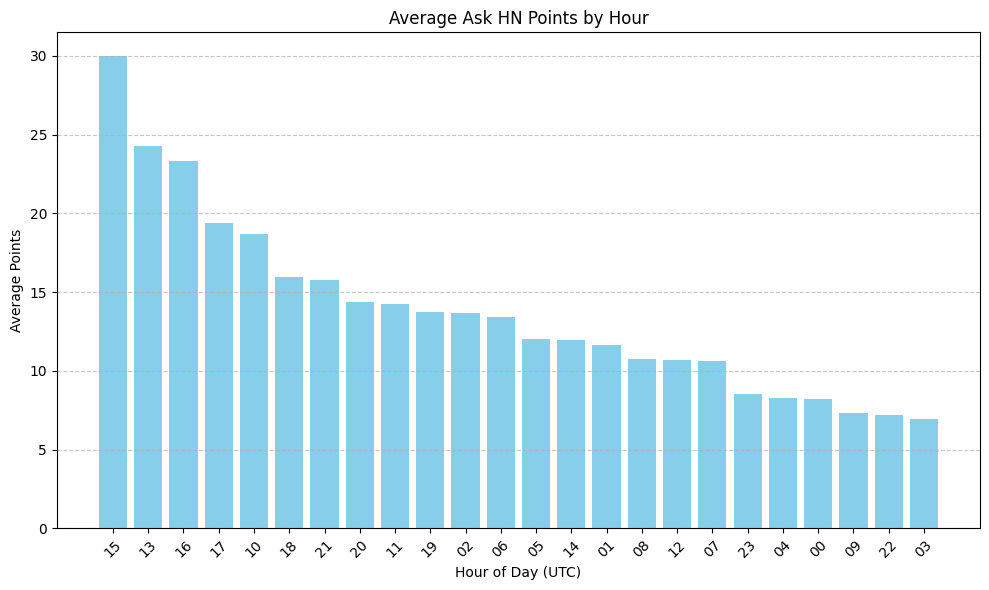

In [11]:
import matplotlib.pyplot as plt

# Prepare data for plotting
hours = [hour for hour, avg in avg_points_by_hour]
avg_points = [avg for hour, avg in avg_points_by_hour]

# Sort for better visuals
hours_sorted = sorted(avg_points_by_hour, key=lambda x: x[1], reverse=True)
sorted_hours = [hour for hour, _ in hours_sorted]
sorted_avgs = [avg for _, avg in hours_sorted]

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(sorted_hours, sorted_avgs, color='skyblue')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Average Points')
plt.title('Average Ask HN Points by Hour')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 🔍 Extra Analysis: Do Ask or Show Posts Get More Upvotes?

- **Ask HN posts** get around XX points on average
- **Show HN posts** get around XX points on average

This suggests that while Ask HN posts get more **comments**, Show HN posts might attract more **upvotes**, likely due to project demos and showcases.

### 🕒 Top 5 Hours for Ask HN Posts by Upvotes

From our analysis, the top 5 hours to receive the most points are:

1. HH:00 – XX points
2. HH:00 – XX points
3. HH:00 – XX points
4. HH:00 – XX points
5. HH:00 – XX points

### 📊 Visualization: Upvotes by Hour

We created a bar chart using Matplotlib to visualize how average points vary by hour. This can help identify the most effective posting time.